In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #1. Explanatory Data Analysis
# application = pd.read_csv("application_record.csv")
# application.columns = map(str.lower, application.columns)
# application.head()

In [3]:
# credit = pd.read_csv("credit_record.csv")
# credit.columns = map(str.lower, credit.columns)
# credit.head()

In [4]:
# #Convert status column to numeric
# credit.status = credit.status.replace({'X':-2, 'C': -1})
# credit.status = credit.status.astype('int')
# credit.status = credit.status.apply(lambda x:x+1)

In [5]:
# #Find the latest month
# credit_month = credit.groupby('id').months_balance.max().reset_index()
# credit_month.head()

In [6]:
# #Merge the df with latest months matched with its status
# record = pd.merge(credit_month, credit, how="inner", on=["id", "months_balance"])
# record.head()

In [7]:
# Merge the record df with application df

In [8]:
# df = pd.merge(application, record, on="id", how="inner")
# df.head()

In [9]:
# #Rename columns
# df = df.rename(columns={'code_gender':'gender',
#                    'flag_own_car':'car',
#                    'flag_own_realty':'property',
#                    'cnt_children':'children',
#                    'amt_income_total':'annual_income',
#                    'name_income_type':'income_type',
#                    'name_education_type':'education',
#                    'name_family_status':'family_status',
#                    'name_housing_type':'housing_type',
#                    'days_birth':'birth_date',
#                    'days_employed':'employment',
#                    'flag_mobil':'mobile_phone',
#                    'flag_work_phone':'work_phone',
#                    'flag_phone':'phone',
#                    'flag_email': 'email',
#                    'cnt_fam_members':'fam_members'
#                    })
# df.head()

In [10]:
# #Check null values
# df.isnull().sum()

In [11]:
# #Fill null values
# df.occupation_type = df.occupation_type.fillna("Others")

In [12]:
# #Transform birth_date and employment to positive numbers
# df['age'] = df.birth_date.apply(lambda x: round(x/-365,0))
# df['year_of_employment'] = df.employment.apply(lambda x: round(x/-365,0) if x<0 else 0)

# df = df.drop(columns=["birth_date","employment"])

In [13]:
# df.head()

In [14]:
df = pd.read_csv('credit_risk_data.csv')
df.head()

,Unnamed: 0,id,gender,car,property,children,annual_income,income_type,education,family_status,...,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,1,1,0,0,Others,2.0,0,0,33.0,12.0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,1,1,0,0,Others,2.0,0,0,33.0,12.0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0


In [15]:
df.describe()

,Unnamed: 0,id,children,annual_income,mobile_phone,work_phone,phone,email,fam_members,months_balance,status,age,year_of_employment
count,36457.000000,3.645700e+04,36457.000000,3.645700e+04,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.00000
mean,18228.000000,5.078227e+06,0.430315,1.866857e+05,1.0,0.225526,0.294813,0.089722,2.198453,-5.831802,-0.002716,43.777382,6.03810
std,10524.373719,4.187524e+04,0.742367,1.017892e+05,0.0,0.417934,0.455965,0.285787,0.911686,11.326494,0.783104,11.519211,6.48948
min,0.000000,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,-1.000000,21.000000,0.00000
25%,9114.000000,5.042028e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,-6.000000,-1.000000,34.000000,1.00000
50%,18228.000000,5.074614e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,43.000000,4.00000
75%,27342.000000,5.115396e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,53.000000,9.00000
max,36456.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,6.000000,69.000000,43.00000


<Axes: >

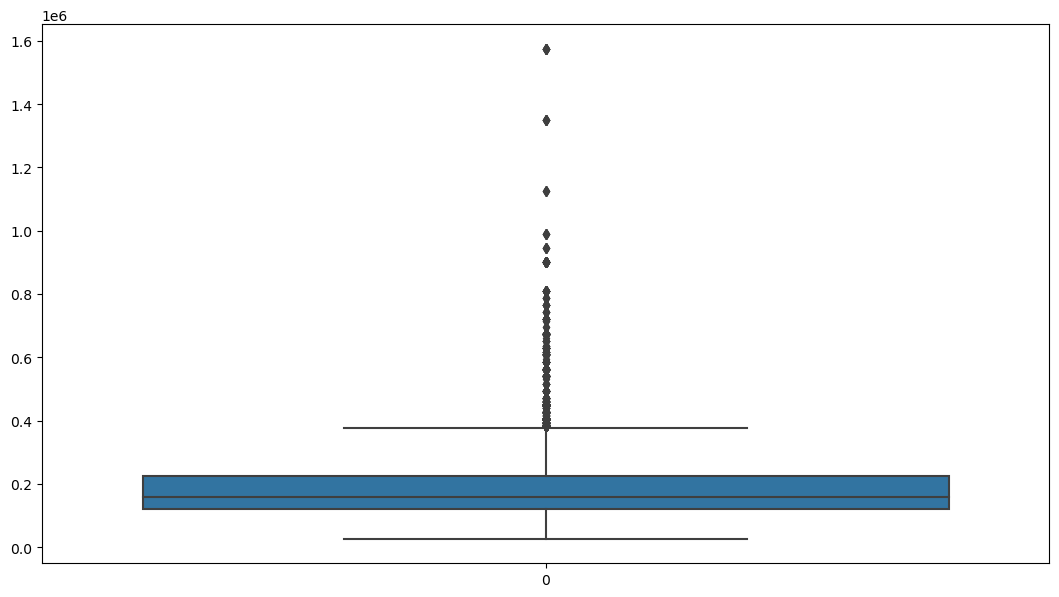

In [16]:
#Detect and remove outliers: Annual_income

plt.figure(figsize=(13,7))
sns.boxplot(df.annual_income)

In [17]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.annual_income)

df = df.loc[(df.annual_income > lower) & (df.annual_income < upper)]

# sns.boxplot(df.annual_income)

In [18]:
#Detect and remove outliers: Fam_members

# sns.boxplot(df.fam_members)

In [19]:
remove_outlier(df.fam_members)

df = df.loc[(df.fam_members>0.5) & (df.fam_members <4.5)]

# sns.boxplot(df.fam_members)

df.fam_members.value_counts()

2.0    18729
1.0     6721
3.0     6057
4.0     2976
Name: fam_members, dtype: int64

In [20]:
df.head()

,Unnamed: 0,id,gender,car,property,children,annual_income,income_type,education,family_status,...,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0
5,5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0
6,6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0


In [21]:
#Define target variable
df.status.value_counts()

 0    17052
-1     9079
 1     7997
 2      262
 6       64
 3       18
 4        6
 5        5
Name: status, dtype: int64

In [22]:
# sns.distplot(df.status, kde=False)

In [23]:
#Target = 1 if status >=1 (with due debt), else Target = 0
df['target'] = None
df.loc[df.status < 1,'target']=0
df.loc[df.status >= 1,'target']=1
df.target = pd.to_numeric(df.target)
df.head()

,Unnamed: 0,id,gender,car,property,children,annual_income,income_type,education,family_status,...,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment,target
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,0,0,0,Security staff,2.0,0,0,59.0,3.0,0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,0,1,1,Sales staff,1.0,0,1,52.0,8.0,1
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0,0
5,5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0
6,6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0


In [24]:
#Drop unnecessary columns
df.drop(columns=['months_balance', 'status', 'mobile_phone'],inplace=True)

In [25]:
#Convert object dtype to category dtype for feature processing
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

Unnamed: 0               int64
id                       int64
gender                category
car                   category
property              category
children                 int64
annual_income          float64
income_type           category
education             category
family_status         category
housing_type          category
work_phone               int64
phone                    int64
email                    int64
occupation_type       category
fam_members            float64
age                    float64
year_of_employment     float64
target                   int64
dtype: object

In [26]:
#2. Feature engineering

In [27]:
#Category encoding
#2.1. Encoding without using the target variable (no independent variables are impacted prior to modeling)
#2.1.1. Binary variable: LabelEncoder, Binarizer
#2.1.2. Nominal variable: using mean or mode // Dummy Coding or OneHotEncoder (<5 values/variable)
#2.1.3. Continous variable: binning with Fixed-width and Adaptive Binning, then apply mean/mode


#2.2. Encoding in relation to the target variable
#2.2.1. WOE Encoder (to pair with IV): apply to the entire dataset
#2.2.2. Compare with Target Encoder/LOO

In [28]:
df_a = df #for 2.1. encoding without target

In [29]:
df_b = df #for 2.2. encoding with target

In [30]:
#Pre-requisite: train test split to avoid data leakage

x_a = df_a.iloc[:, 1:-1]
y_a = df_a.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1)

In [31]:
#2.1. Encoding WITHOUT target (using df_a)

In [32]:
#2.1.1 Binary variables: gender, car, property

#Option 1: Label Encoder (applied to >2 categories per variable)
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()
gender_le = le.fit_transform(x_a_train.gender)

#Option 2: LabelBinarizer (applied to 2 categories per variable only)
bn = LabelBinarizer()

gender_bn = np.array(x_a_train.gender).reshape(-1,1)
gender_bn = bn.fit_transform(gender_bn)

#Apply to x_train and x_test

x_a_train.loc[:, 'gender'] = le.fit_transform(x_a_train.loc[:, 'gender'])
x_a_train.loc[:, 'car'] = le.fit_transform(x_a_train.loc[:, 'car'])
x_a_train.loc[:, 'property'] = le.fit_transform(x_a_train.loc[:, 'property'])

x_a_test.loc[:, 'gender'] = le.fit_transform(x_a_test.loc[:, 'gender'])
x_a_test.loc[:, 'car'] = le.fit_transform(x_a_test.loc[:, 'car'])
x_a_test.loc[:, 'property'] = le.fit_transform(x_a_test.loc[:, 'property'])

C:\Users\Nabodita\AppData\Local\Temp\ipykernel_36036\4014354429.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_a_train.loc[:, 'gender'] = le.fit_transform(x_a_train.loc[:, 'gender'])
C:\Users\Nabodita\AppData\Local\Temp\ipykernel_36036\4014354429.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_a_train.loc[:, 'car'] = le.fit_transform(x_a_train.loc[:, 'car'])
C:\Users\Nabodita\AppData\Local\Temp\ipykernel_36036\4014354429.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values i

In [33]:
#2.1.2. Nominal variables: income_type, education, family_status, housing_type, occupation_type

#Option 1: Dummy Coding: kn - k variables

income_type_dummy = pd.get_dummies(x_a_train.income_type)
print(income_type_dummy)

#Option 2: OneHotEcnoder: kn variables

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
income_type_onehot = onehot.fit_transform(x_a_train.income_type.to_numpy().reshape(-1,1))
income_type_onehot = pd.DataFrame(income_type_onehot, columns=onehot.get_feature_names_out(['income_type']))
income_type_onehot.head()

#As OneHotEncoder of sklearn was designed to keep the consistency in the number of categories across train and
#test set, so we can control any category which doesn't appear in train set with "handle_unknown="error""

#Apply for x_train set

nominal = onehot.fit_transform(x_a_train[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal = pd.DataFrame(index=x_a_train.index, data=nominal, columns=onehot.get_feature_names_out(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_train = pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_train.shape


       Commercial associate  Pensioner  State servant  Student  Working
25003                     0          1              0        0        0
34848                     0          1              0        0        0
13418                     1          0              0        0        0
13885                     0          0              0        0        1
26023                     0          0              0        0        1
...                     ...        ...            ...      ...      ...
8257                      0          1              0        0        0
34349                     0          0              0        0        1
5489                      0          1              0        0        0
12808                     0          0              0        0        1
34865                     1          0              0        0        0

[24138 rows x 5 columns]


C:\Users\Nabodita\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nabodita\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(24138, 47)

In [34]:
#Apply for x_test set

nominal_test = onehot.fit_transform(x_a_test[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal_test = pd.DataFrame(index=x_a_test.index, data=nominal_test, columns=onehot.get_feature_names_out(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_test = pd.concat([x_a_test, df_nominal_test], axis=1)
x_a_test.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_test.head()

C:\Users\Nabodita\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,gender,car,property,children,annual_income,work_phone,phone,email,fam_members,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
7293,5033952,0,0,1,0,157500.0,0,1,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25145,5118190,1,0,0,0,180000.0,1,1,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18640,5069425,1,1,1,0,202500.0,0,1,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23707,5096098,0,0,0,0,67500.0,0,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2403,5021839,0,0,1,0,157500.0,0,0,1,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([12767.,  5353.,  2842.,  1624.,   640.,   412.,   304.,   115.,
           49.,    32.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

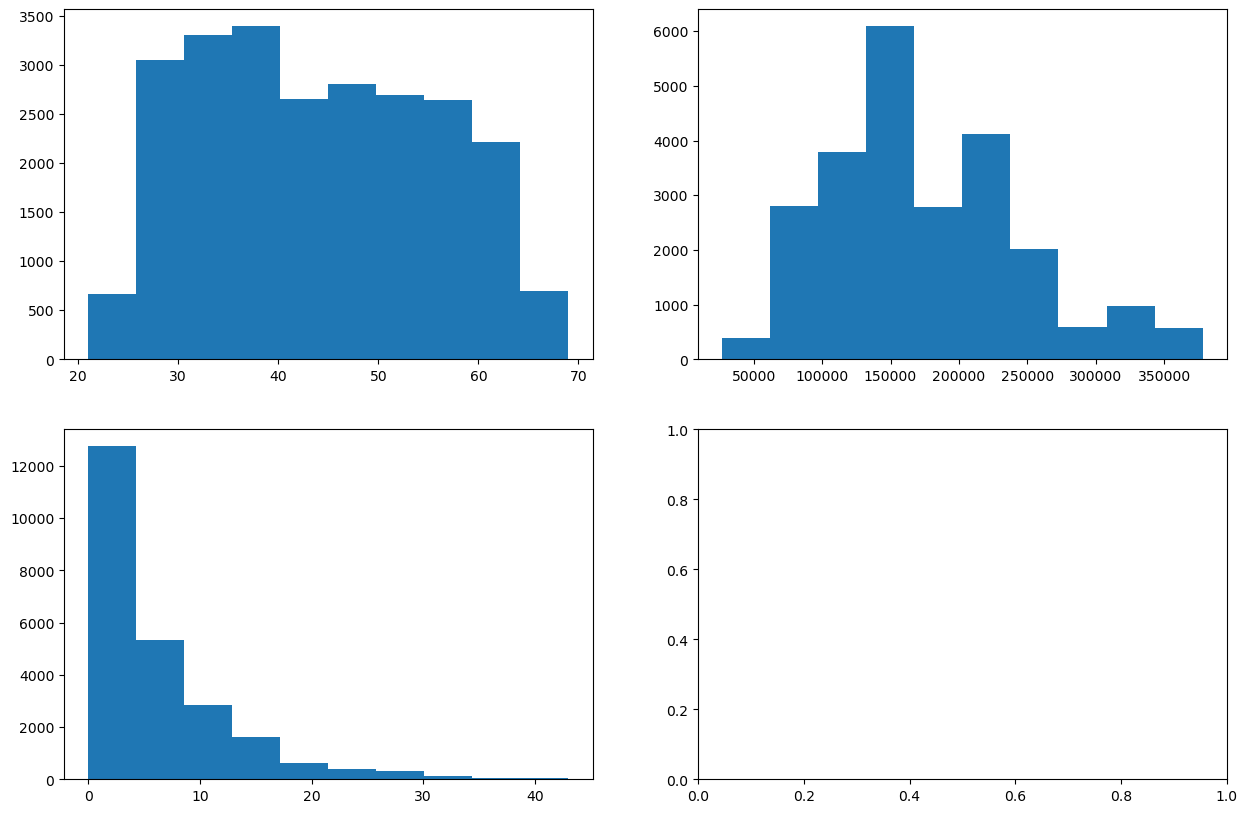

In [35]:
#2.1.3. Continuous variables: annual_income, age, year_of_employment

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(x_a_train.age)
ax[0][1].hist(x_a_train.annual_income)
ax[1][0].hist(x_a_train.year_of_employment)

In [36]:
#Option: Fixed-width binning (rounding) or Adaptive binning (quantiles)
#Here, we apply adaptive binning since fixed-width binning requires pre-defining the bins (which is subjective)

#Apply to x_train set

x_a_train['age_binned'] = pd.qcut(x_a_train.age, q=[0, .25, .50, .75, 1])
x_a_train['annual_income_binned'] = pd.qcut(x_a_train.annual_income, q=[0, .25, .50, .75, 1])
x_a_train['year_of_employment_binned'] = pd.qcut(x_a_train.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_train.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_train['age'] = le.fit_transform(x_a_train['age_binned'])
x_a_train['annual_income'] = le.fit_transform(x_a_train['annual_income_binned'])
x_a_train['year_of_employment'] = le.fit_transform(x_a_train['year_of_employment_binned'])

x_a_train.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)

x_a_train.head()

,id,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
25003,5117904,0,1,0,0,0,1,0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
34848,5148616,0,0,0,0,0,0,0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
13418,5053876,0,1,1,2,0,0,0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
13885,5054471,1,1,1,0,1,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
26023,5105824,0,0,0,0,0,0,0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,2


In [37]:
#Apply to x_test set

x_a_test['age_binned'] = pd.qcut(x_a_test.age, q=[0, .25, .50, .75, 1])
x_a_test['annual_income_binned'] = pd.qcut(x_a_test.annual_income, q=[0, .25, .50, .75, 1])
x_a_test['year_of_employment_binned'] = pd.qcut(x_a_test.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_test.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_test['age'] = le.fit_transform(x_a_test['age_binned'])
x_a_test['annual_income'] = le.fit_transform(x_a_test['annual_income_binned'])
x_a_test['year_of_employment'] = le.fit_transform(x_a_test['year_of_employment_binned'])

x_a_test.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)

x_a_test.head()

,id,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
7293,5033952,0,0,1,0,0,1,1,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1
25145,5118190,1,0,0,0,1,1,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3
18640,5069425,1,1,1,0,0,1,0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0
23707,5096098,0,0,0,0,0,0,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
2403,5021839,0,0,1,0,0,0,1,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0


In [38]:
#3. Feature Scaling (Data Standardization/Normalization)

#3.1. df_a (encoded without target)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_a_train_ss = pd.DataFrame(StandardScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_ss.head()

,id,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,0.938684,-0.686768,1.314445,-1.415929,-0.599431,-0.539709,1.557177,-0.312539,-0.184721,2.161371,...,1.476279,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,1.392870,-1.329728,-1.242572
1,1.671835,-0.686768,-0.760777,-1.415929,-0.599431,-0.539709,-0.642188,-0.312539,-0.184721,2.161371,...,1.476279,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,1.392870,-1.329728,-1.242572
2,-0.589781,-0.686768,1.314445,0.706250,2.477130,-0.539709,-0.642188,-0.312539,2.218294,-0.462669,...,-0.677379,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,-0.408566,-0.375824,-0.373657
3,-0.575577,1.456097,1.314445,0.706250,-0.599431,1.852851,1.557177,-0.312539,-1.386228,-0.462669,...,-0.677379,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,-1.309283,-0.375824,0.495258
4,0.650312,-0.686768,-0.760777,-1.415929,-0.599431,-0.539709,-0.642188,-0.312539,-0.184721,-0.462669,...,-0.677379,-0.097435,-0.046014,3.075452,-0.066098,-0.129314,-0.07009,-1.309283,-1.329728,0.495258


In [39]:
x_a_train_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_rs.head()

,id,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,0.533351,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,-0.5
1,0.952230,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,-0.5
2,-0.339923,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.331808,1.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.5
4,0.368592,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,-0.5,0.5


In [40]:
x_a_train_mm = pd.DataFrame(MinMaxScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_mm.head()

,id,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,0.770036,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.333333,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
1,0.986808,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
2,0.318113,0.0,1.0,1.0,0.666667,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
3,0.322313,1.0,1.0,1.0,0.000000,1.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.666667
4,0.684773,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.666667


In [41]:
#Standard Scaler shrinks data to mean=0 and std =1 with the presence of outlier affecting the balanced scale
#MinMaxScaler compress data to a range of [0,1] which is limited to modeling
#Robust Scaler shrinks data to medians and quantiles, thus not influenced by outliers

#Apply to x_test set

x_a_test_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_test), columns=x_a_test.columns)

In [42]:
#5. Feature Selection // Dimensionality Reduction

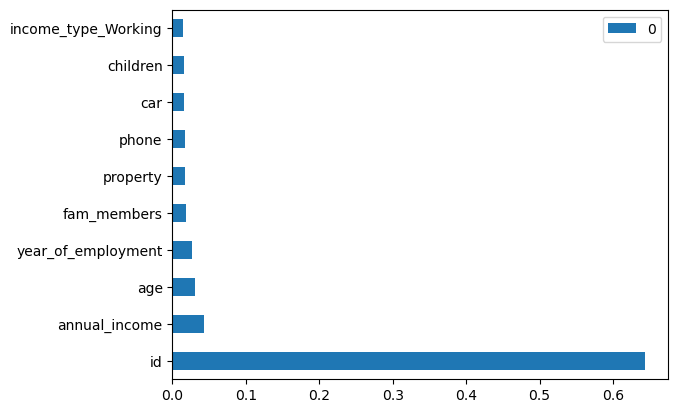

In [43]:
#5.1. Feature Importance

#5.1.1. Test on df_a set first
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi_a = fi.fit(x_a_train_rs, y_a_train)

df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=x_a_train_rs.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

family_status_Married              -0.015392
fam_members                        -0.015081
education_Lower secondary          -0.010833
children                           -0.010367
occupation_type_Sales staff        -0.009615
occupation_type_Others             -0.009285
housing_type_Municipal apartment   -0.007415
work_phone                         -0.007361
income_type_Working                -0.006919
occupation_type_Secretaries        -0.006741
Name: target, dtype: float64


<Axes: >

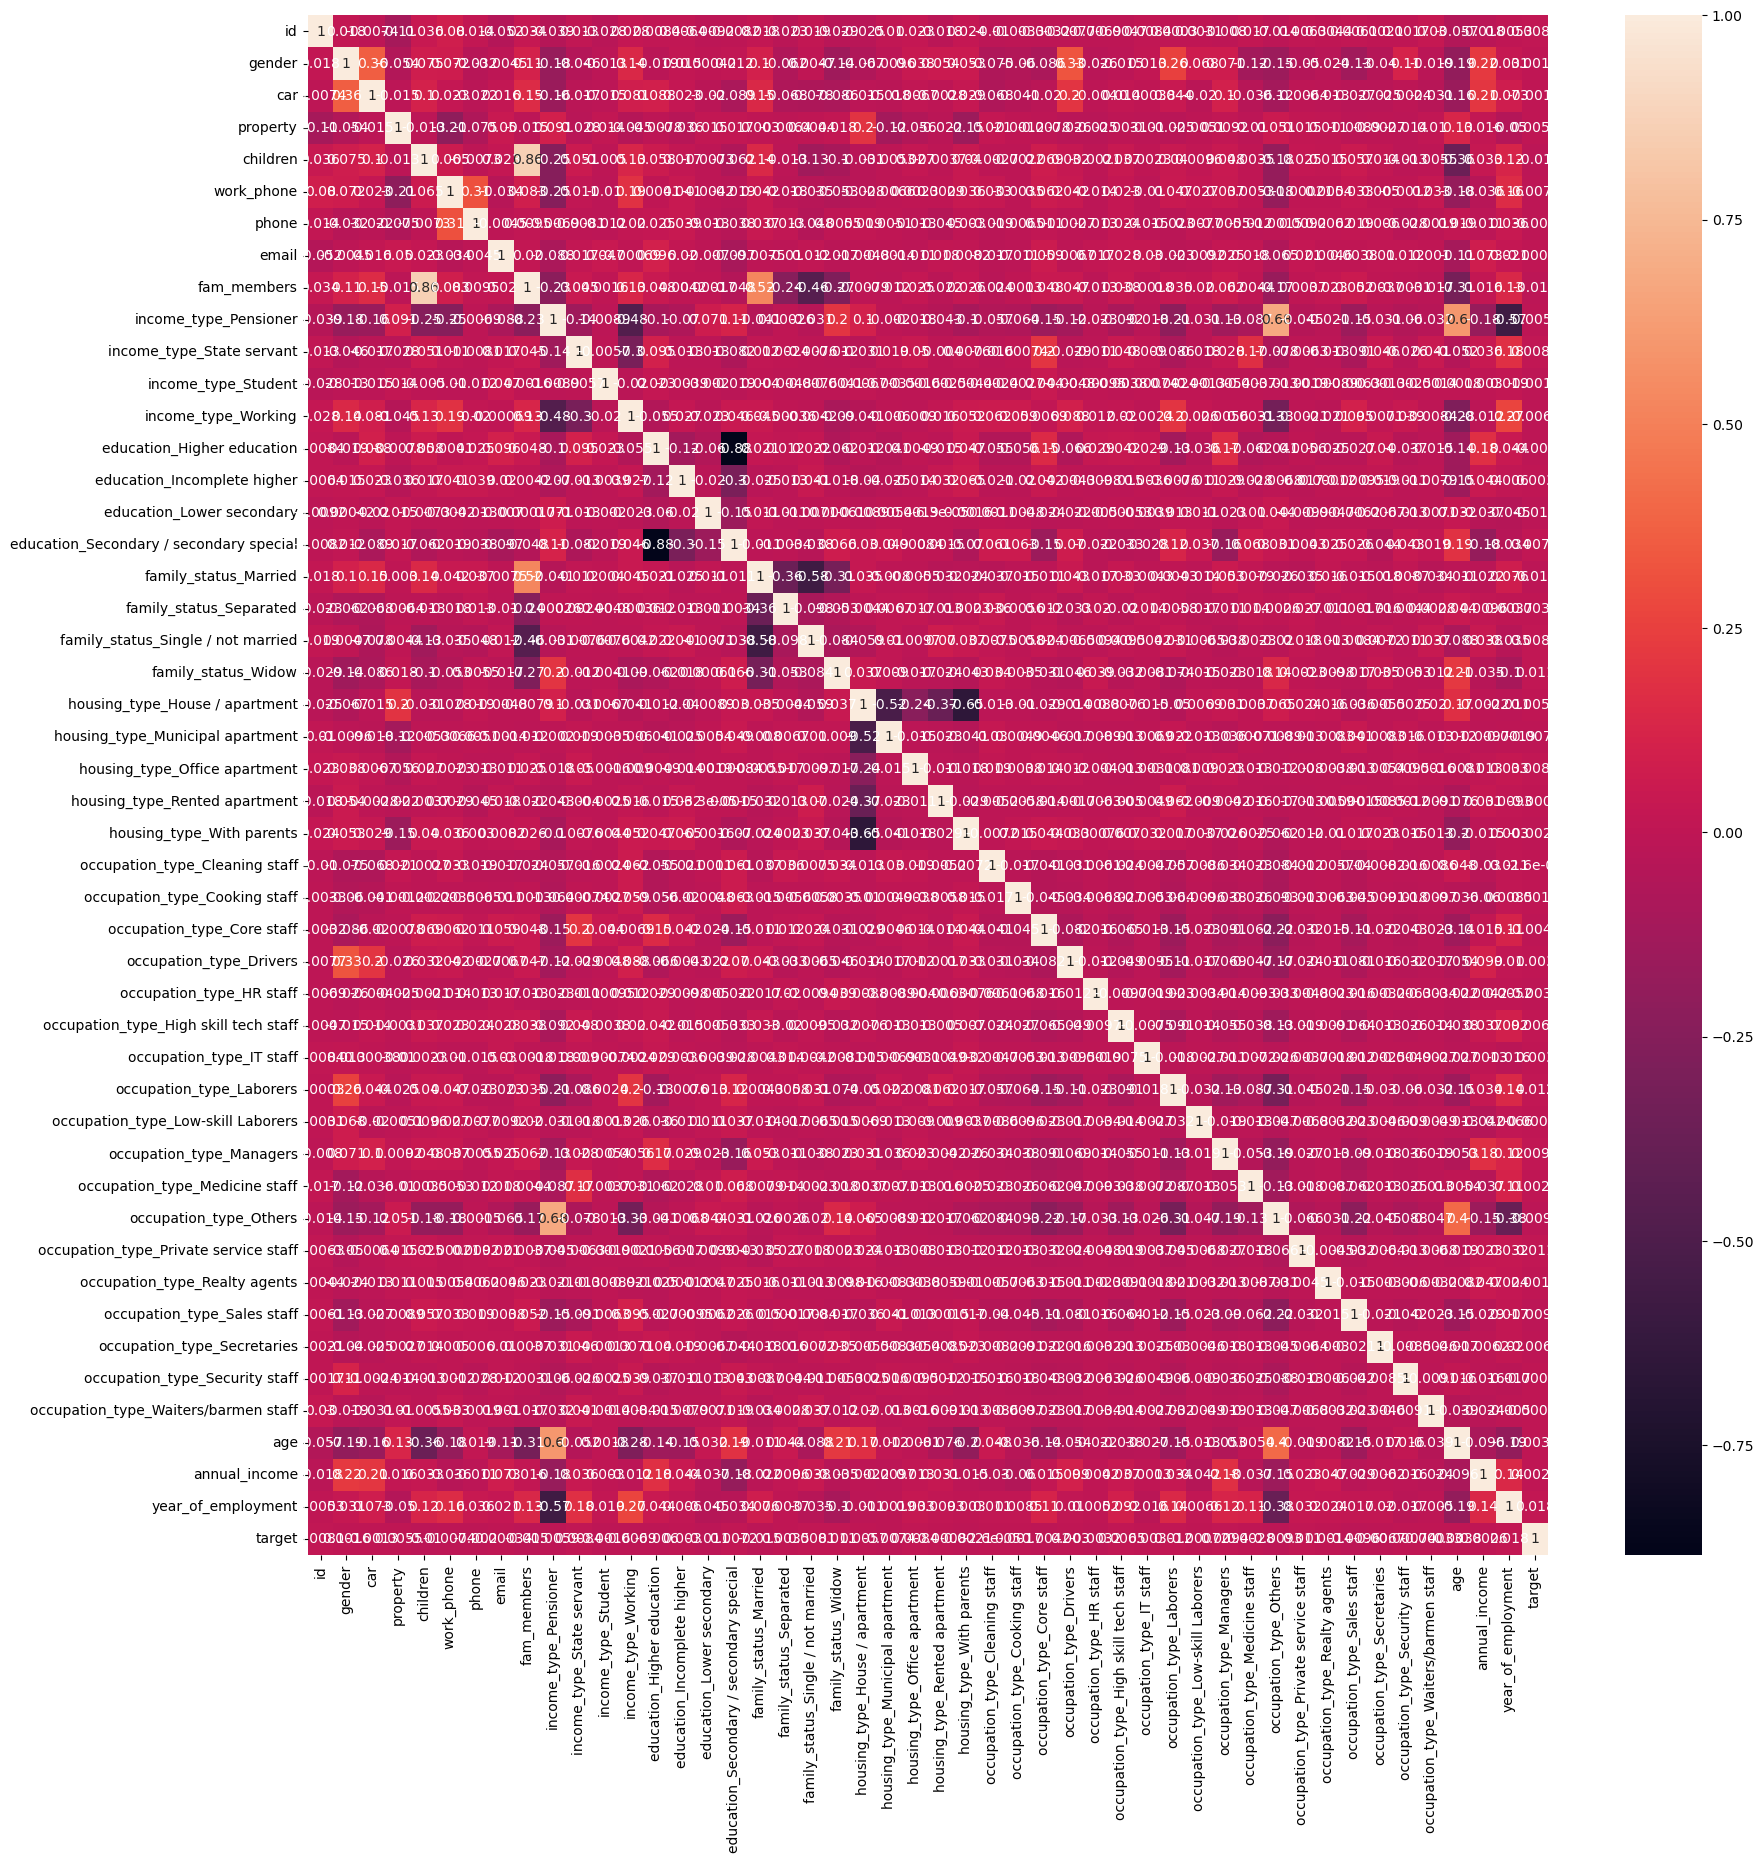

In [44]:
#5.2. Correlation Matrix

#5.2.1. Test on df_a set

df_a_train_processed = pd.concat([x_a_train_rs, y_a_train], axis=1) #combine processed features with their target

cm_a = df_a_train_processed.corr()

# print(cm_a.target.sort_values().tail(10))
print(cm_a.target.sort_values().head(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_a, xticklabels=df_a_train_processed.columns, yticklabels=df_a_train_processed.columns,annot=True)

25


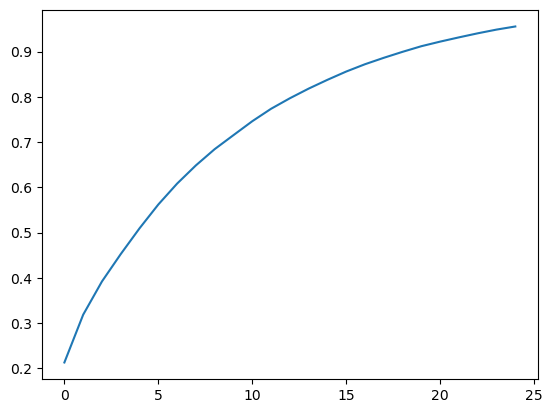

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.068131,1.193982,-0.168954,0.559728,0.738887,-0.071045,0.451573,0.539715,-0.024931,0.735168,...,-0.259513,0.115006,0.097056,0.027522,0.031874,0.098389,-0.017982,-0.042496,0.084407,-0.004961
1,-0.984004,1.485960,-0.337401,0.852288,0.762421,-0.359498,-0.055488,-0.154592,0.594360,0.125551,...,-0.171413,0.040448,-0.090451,0.054793,0.002086,0.090400,-0.009661,-0.078827,-0.084549,-0.020114
2,2.286548,0.953140,1.154231,-0.111762,-0.478330,0.298301,-0.180676,-0.231462,0.038836,0.296941,...,0.067594,-0.291769,-0.127622,0.018866,0.783795,0.308789,-0.164645,-0.099197,-0.045704,-0.136178
3,-0.688546,-1.600644,-0.481293,-0.125230,0.198546,0.713906,0.833464,0.328879,-0.507563,0.293863,...,0.685745,-0.129343,-0.393951,0.027668,0.234060,-0.130953,-0.083976,-0.188042,-0.030401,0.992179
4,0.039396,-0.444901,-0.882985,0.735220,-0.114338,-0.055016,0.199030,-0.676653,0.690113,-0.358805,...,-0.575256,-0.511216,0.024854,-0.140168,-0.318742,0.139365,-0.138223,0.060711,0.040890,-0.064386


In [45]:
#5.3. Dimensionality Reduction (Component-based): PCA 
#PCA groups variables by their correlations, and each group is condisidered as a factor
#PCA creates a new set of variables with a smaller set of factors that are uncorrelated
#in such a way that 1st PC explains maximum variance, followed by 2nd and so on (n_components)

#5.3.1. PCA on df_a set

df_a_train_processed.shape

from sklearn.decomposition import PCA

pca = PCA(.95)

pca_a_train = pca.fit(x_a_train_rs, y_a_train)
print(pca_a_train.n_components_)

plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()

x_a_train_rs_over_pca = pd.DataFrame(pca_a_train.transform(x_a_train_rs))
x_a_train_rs_over_pca.head()


In [46]:
#Apply PCA on x_test set

pca_a_test = pca.fit(x_a_test_rs, y_a_test)
print(pca_a_test.n_components_)

x_a_test_rs_over_pca = pd.DataFrame(pca_a_test.transform(x_a_test_rs))
x_a_test_rs_over_pca.head()

25


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.516046,-0.067962,-0.507248,-0.049103,-0.900264,0.021014,-0.250486,0.044407,-0.667439,-0.396263,...,-0.539395,-0.304018,0.278738,0.150019,0.829653,-0.056481,-0.070610,0.418824,0.150305,-0.050383
1,0.055441,-0.983801,-0.910250,-0.039727,0.799711,-0.895413,-0.294377,0.547291,-0.243192,0.200652,...,-0.008185,-0.042615,-0.031791,-0.166974,0.157863,-0.130003,-0.044929,0.030227,0.020909,0.013754
2,-0.160159,-0.151517,-0.234381,-0.732668,0.621765,0.287240,-0.638082,-0.092527,-0.438179,-0.424234,...,0.127952,-0.451477,-0.108376,-0.371561,0.119882,-0.138846,-0.395447,0.415250,-0.063102,-0.012403
3,-1.920315,1.030093,-0.280010,0.599086,0.167173,0.359054,0.005752,0.292260,0.416629,0.644492,...,-0.163496,0.034822,0.391419,0.007808,-0.023878,-0.101067,0.058771,0.032060,0.727007,0.121915
4,-0.989778,1.543994,0.088730,-0.565759,-0.430181,-0.056842,-0.107503,-0.108770,0.188279,-0.195149,...,0.105494,0.102642,0.060137,0.506269,0.779417,-0.044312,0.029895,0.067347,-0.101720,-0.051502


In [47]:
x_a_train_rs_over_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.068131,1.193982,-0.168954,0.559728,0.738887,-0.071045,0.451573,0.539715,-0.024931,0.735168,...,-0.259513,0.115006,0.097056,0.027522,0.031874,0.098389,-0.017982,-0.042496,0.084407,-0.004961
1,-0.984004,1.485960,-0.337401,0.852288,0.762421,-0.359498,-0.055488,-0.154592,0.594360,0.125551,...,-0.171413,0.040448,-0.090451,0.054793,0.002086,0.090400,-0.009661,-0.078827,-0.084549,-0.020114
2,2.286548,0.953140,1.154231,-0.111762,-0.478330,0.298301,-0.180676,-0.231462,0.038836,0.296941,...,0.067594,-0.291769,-0.127622,0.018866,0.783795,0.308789,-0.164645,-0.099197,-0.045704,-0.136178
3,-0.688546,-1.600644,-0.481293,-0.125230,0.198546,0.713906,0.833464,0.328879,-0.507563,0.293863,...,0.685745,-0.129343,-0.393951,0.027668,0.234060,-0.130953,-0.083976,-0.188042,-0.030401,0.992179
4,0.039396,-0.444901,-0.882985,0.735220,-0.114338,-0.055016,0.199030,-0.676653,0.690113,-0.358805,...,-0.575256,-0.511216,0.024854,-0.140168,-0.318742,0.139365,-0.138223,0.060711,0.040890,-0.064386


In [48]:
#6. Apply algorithm 
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [49]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [50]:
#6.1. Modelling across different classifiers

In [51]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_a_train_rs_over_pca, y_a_train)
classifier.score(x_a_train_rs_over_pca, y_a_train)

0.7591349739000746

In [53]:
#Compute the training score of each models

train_scores = []
test_scores = []

# classifier = LogisticRegression(random_state = 0)
# classifier.fit(x_a_train_rs_over_pca, y_a_train)
# train_score = classifier.score(x_a_train_rs_over_pca, y_a_train)
# test_scores.append(train_score)
# test_score = classifier.score(x_a_test_rs_over_pca, y_a_test)
# test_scores.append(test_score)
# print("Logistic Regression : ", test_score)

# KNN = KNeighborsClassifier(5)
# KNN.fit(x_a_train_rs_over_pca, y_a_train)
# train_score = KNN.score(x_a_train_rs_over_pca, y_a_train)
# test_scores.append(train_score)
# test_score = KNN.score(x_a_test_rs_over_pca, y_a_test)
# test_scores.append(test_score)

# classifier = SVC(random_state = 0)
# classifier.fit(x_a_train_rs_over_pca, y_a_train)
# train_score = classifier.score(x_a_train_rs_over_pca, y_a_train)
# test_scores.append(train_score)
# test_score = classifier.score(x_a_test_rs_over_pca, y_a_test)
# test_scores.append(test_score)
# print("SVC : ", test_score)

# classifier = DecisionTreeClassifier(random_state = 0)
# classifier.fit(x_a_train_rs_over_pca, y_a_train)
# train_score = classifier.score(x_a_train_rs_over_pca, y_a_train)
# test_scores.append(train_score)
# test_score = classifier.score(x_a_test_rs_over_pca, y_a_test)
# test_scores.append(test_score)
# print("Decision Tree : ", test_score)


classifier = RandomForestClassifier(random_state = 0)
classifier.fit(x_a_train_rs_over_pca, y_a_train)
train_score = classifier.score(x_a_train_rs_over_pca, y_a_train)
test_scores.append(train_score)
test_score = classifier.score(x_a_test_rs_over_pca, y_a_test)
test_scores.append(test_score)
print("Random Forest : ", test_score)



# for key, classifier in classifiers.items():
#     classifier.fit(x_a_train_rs_over_pca, y_a_train)
#     train_score = classifier.score(x_a_train_rs_over_pca, y_a_train)
#     train_scores.append(train_score)
#     test_score = round(classifier.score(x_a_test_rs_over_pca, y_a_test),2)
#     test_scores.append(test_score)

print(train_scores)
print(test_scores)

Random Forest :  0.7550507491541808
[]
[0.9997928577346922, 0.7550507491541808]


In [55]:
#Cross validation score

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []


# for key, classifier in classifiers.items():
#     RandomForest().fit(x_a_train_rs_over_pca, y_a_train)
#     train_score = cross_val_score(classifier, x_a_train_rs_over_pca, y_a_train, cv=5)
#     train_cross_scores.append(round(train_score.mean(),2))
#     test_score = cross_val_score(classifier, x_a_test_rs_over_pca, y_a_test, cv=5)
#     test_cross_scores.append(round(test_score.mean(),2))
    

RandomForestClassifier().fit(x_a_train_rs_over_pca, y_a_train)
train_score = cross_val_score(RandomForestClassifier(), x_a_train_rs_over_pca, y_a_train, cv=5)
train_cross_scores.append(round(train_score.mean(),2))
test_score = cross_val_score(RandomForestClassifier(), x_a_test_rs_over_pca, y_a_test, cv=5)
test_cross_scores.append(round(test_score.mean(),2))

print(train_cross_scores)
print(test_cross_scores)


[0.71]
[0.71]


In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(x_a_train_rs_over_pca, y_a_train)
rf_pred = cross_val_predict(rf, x_a_test_rs_over_pca, y_a_test, cv=5)
print(roc_auc_score(y_a_test, rf_pred))

0.5545612416894055


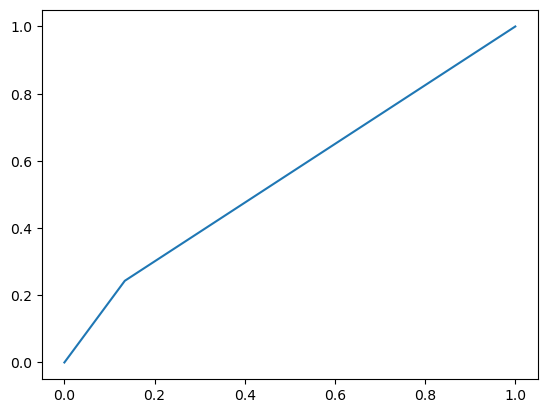

In [57]:
fpr, tpr, _ = roc_curve(y_a_test, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [60]:
import pickle
filename = 'creditRiskModel.h5'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
#6.2. Hyperparameter Tuning

In [ ]:
# #Use GridSearchCV to find the best parameters

# from sklearn.model_selection import GridSearchCV

# #Logistic Regression
# lr = LogisticRegression()
# lr_params = {"penalty": ['l1', 'l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                   "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# grid_logistic = GridSearchCV(lr, lr_params)
# grid_logistic.fit(x_a_train_rs_over_pca, y_a_train)
# lr_best = grid_logistic.best_estimator_

# #KNearest Neighbors
# knear = KNeighborsClassifier()
# knear_params = {"n_neighbors": list(range(2,7,1)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brutle']}
# grid_knear = GridSearchCV(knear, knear_params)
# grid_knear.fit(x_a_train_rs_over_pca, y_a_train)
# knear_best = grid_knear.best_estimator_

# #SVC

# svc = SVC()
# svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(svc, svc_params)
# grid_svc.fit(x_a_train_rs_over_pca, y_a_train)
# svc_best = grid_svc.best_estimator_

# #Decision Tree

# tree = DecisionTreeClassifier()
# tree_params = {"criterion": ['gini', 'entropy'], "max_depth":list(range(2,5,1)), "min_samples_leaf":list(range(5,7,1))}
# grid_tree = GridSearchCV(tree, tree_params)
# grid_tree.fit(x_a_train_rs_over_pca, y_a_train)
# tree_best = grid_tree.best_estimator_


In [ ]:
#7. Advanced Machine Learning Model: XGBoost, LightGBM

In [ ]:
# import xgboost as xgb

# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
# xgb_train_score = cross_val_score(xgb_model, x_a_train_rs_over_pca, y_a_train_over, cv=5)
# xgb_test_score = cross_val_score(xgb_model, x_a_test_rs_over_pca, y_a_test_over, cv=5)

# print(round(xgb_train_score.mean(),2))
# print(round(xgb_test_score.mean(),2))

In [ ]:
# import lightgbm as lgb

# lgb_model = lgb.LGBMClassifier()
# lgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
# lgb_train_score = cross_val_score(lgb_model, x_a_train_rs_over_pca, y_a_train_over, cv=5)
# lgb_test_score = cross_val_score(lgb_model, x_a_test_rs_over_pca, y_a_test_over, cv=5)

# print(round(lgb_train_score.mean(),2))
# print(round(lgb_test_score.mean(),2))